In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.style.use('~/Python_Tool/ryan_mplstyle.mplstyle')

import numpy as np

import h5py
import cmocean.cm as cmo
import dedalus.public as d3
from scipy.stats import skew

import sys
sys.path.insert(0, '../../subroutines')
from isospectrum import isospectrum

In [2]:
Ro = 0.0
randseed = 2

dgname = 'EadyQGPl_dg_%.3f_%d/EadyQGPl_dg_%.3f_%d_s%i' %(Ro, randseed, Ro, randseed, 1)
dgname = dgname.replace(".", "d" ); dgname = "../"+dgname+'.h5'

with h5py.File(dgname, mode='r') as file:
    KE_QGdata = np.squeeze(np.array(file['tasks']['KE']))
    PE_QGdata = np.squeeze(np.array(file['tasks']['PE']))
    dg_time_ary = np.array(file['scales']['sim_time'])

spname = 'EadyQGPl_sp_%.3f_%d/EadyQGPl_sp_%.3f_%d_s%i' %(Ro, randseed, Ro, randseed, int((dg_time_ary[-1]-1)/10+1) )
spname = spname.replace(".", "d" ); spname = "../"+spname+'.h5'

with h5py.File(spname, mode='r') as file:
    bt_QGdata = np.squeeze(np.array(file['tasks']['b_top']))
    zetat_QGdata = np.squeeze(np.array(file['tasks']['zeta_top']))*0.032
    divt_QGdata = np.squeeze(np.array(file['tasks']['div_top']))*0.032
    straint_QGdata = np.squeeze(np.array(file['tasks']['strain_top']))*0.032

    print(np.array(file['scales']['sim_time']))

[189.99987244 191.00029354 192.00093388 193.0005211  193.99911939
 194.99972365 195.99995516 196.9985565  197.99931402 199.00042982]


In [3]:
Ro = 0.032
sel = 2
randseed = sel

dgname = 'EadyQGPl_dg_%.3f_%d/EadyQGPl_dg_%.3f_%d_s%i' %(Ro, randseed, Ro, randseed, 1)
dgname = dgname.replace(".", "d" ); dgname = "../"+dgname+'.h5'

with h5py.File(dgname, mode='r') as file:
    KE_data_notscaled = np.squeeze(np.array(file['tasks']['KE']))
    KE_uv_data = np.squeeze(np.array(file['tasks']['KE_uv']))
    # KE_w_data = KE_data_notscaled-KE_uv_data
    KE_data = KE_uv_data
    PE_data = np.squeeze(np.array(file['tasks']['PE']))
    KE_G_data = np.squeeze(np.array(file['tasks']['KE_G']))
    PE_G_data = np.squeeze(np.array(file['tasks']['PE_G']))
    
    dg_time_ary = np.array(file['scales']['sim_time'])
    print(dg_time_ary[-10:-1])

spname = 'EadyQGPl_sp_%.3f_%d/EadyQGPl_sp_%.3f_%d_s%i' %(Ro, randseed, Ro, randseed, int((dg_time_ary[-1]-1)/10+1) )
spname = spname.replace(".", "d" ); spname = "../"+spname+'.h5'

with h5py.File(spname, mode='r') as file:
    bt_data = np.squeeze(np.array(file['tasks']['b_top']))
    zetat_data = np.squeeze(np.array(file['tasks']['zeta_top']))*0.032
    divt_data = np.squeeze(np.array(file['tasks']['div_top']))*0.032
    straint_data = np.squeeze(np.array(file['tasks']['strain_top']))*0.032
    
    sim_time_ary = np.array(file['scales']['sim_time'])
    print(sim_time_ary)
    
    x = np.array(file['scales'][list(file['scales'])[-3]])
    y = np.array(file['scales'][list(file['scales'])[-2]])
    z = np.array(file['scales'][list(file['scales'])[-1]])  

[199.00033281 199.09997698 199.1996814  199.29996066 199.4007572
 199.49963594 199.60030563 199.70066643 199.79967911]
[189.9998602  191.00018076 191.99990206 192.99922857 194.00014764
 195.00033479 196.00027595 196.99941372 197.99979998 199.00033281]


In [4]:
Nx, Ny = bt_data.shape[2], bt_data.shape[2]
L = x[-1]/(Nx-1)*Nx

time_idx = 0

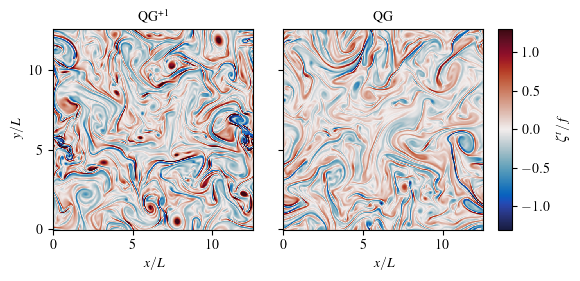

In [5]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(6, 2.6))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.3,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

clim = 1.3

im0 = grid[0].pcolormesh(x,y,zetat_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-clim, vmax=clim)
grid[0].set_aspect('equal')
grid[0].set_yticks([0,5,10])
grid[0].set_xlabel("$x/L$"); 
grid[0].set_ylabel("$y/L$")
grid[0].set_title("QG$\\textsuperscript{+1}$")

im1 = grid[1].pcolormesh(x,y,zetat_QGdata[time_idx,:,:].T, cmap=cmo.balance, vmin=-clim, vmax=clim)
grid[1].set_aspect('equal')
grid[1].set_xlabel("$x/L$"); 
grid[1].set_title("QG")

# Colorbar
cbar = grid[1].cax.colorbar(im1)
cbar.set_label("$\zeta^t/f$")

figname = 'figs/EadyQGpl_zeta_snap_t%.1f' %(sim_time_ary[time_idx])
figname = figname.replace(".", "d" ); figname = figname+'.png'
plt.savefig(figname, bbox_inches='tight', dpi=800)

In [6]:
# fig = plt.figure(figsize=(6, 2.6))

# grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
#                  nrows_ncols=(1,2),
#                  axes_pad=0.4,
#                  share_all=True,
#                  cbar_location="right",
#                  cbar_mode="single",
#                  cbar_size="7%",
#                  cbar_pad=0.15,
#                  )

# clim = 0.7

# im0 = grid[0].pcolormesh(x,y,Ro*(bt_data[time_idx,:,:]-(y-L/2)).T, cmap=cmo.thermal, vmin=-clim, vmax=clim)
# grid[0].set_aspect('equal')
# grid[0].set_xticks([])
# grid[0].set_yticks([])

# im1 = grid[1].pcolormesh(x,y,Ro*(bt_QGdata[time_idx,:,:]-(y-L/2)).T, cmap=cmo.thermal, vmin=-clim, vmax=clim)
# grid[1].set_aspect('equal')
# grid[1].set_xticks([])
# grid[1].set_yticks([])

# # Colorbar
# grid[1].cax.colorbar(im1)
# grid[1].cax.toggle_label(True)

# figname = 'figs/EadyQGpl_b_snap_t%.1f' %(sim_time_ary[time_idx])
# figname = figname.replace(".", "d" ); figname = figname+'.png'
# # plt.savefig(figname, bbox_inches='tight', dpi=800)

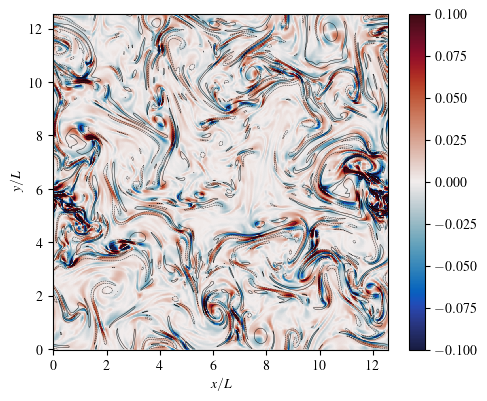

In [7]:
fig=plt.figure(figsize=(5.4, 4.36))

plt.contour(x,y,zetat_data[time_idx,:,:].T, [-0.4, 0.4], colors='black', linewidths=0.3)
clim = 0.1; plt.pcolormesh(x,y,divt_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-clim, vmax=clim)

plt.colorbar()
plt.axis('equal')
plt.xlabel("$x/L$"); 
plt.ylabel("$y/L$")

figname = 'figs/EadyQGpl_zetadiv_snap_Ro%.2f_t%.1f' %(Ro, sim_time_ary[time_idx])
figname = figname.replace(".", "d" ); figname = figname+'.png'
plt.savefig(figname, bbox_inches='tight', dpi=800)

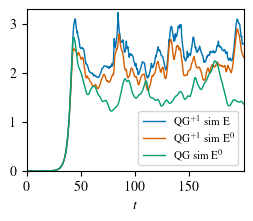

In [8]:
fig=plt.figure(figsize=(2.8, 2.1))

vol = (4*np.pi)**2*1

plt.plot(dg_time_ary,(KE_data+PE_data)/vol,label=r"QG$^{+1}$ sim E")
plt.plot(dg_time_ary,(KE_G_data+PE_G_data)/vol,label=r"QG$^{+1}$ sim E$^0$")
plt.plot(dg_time_ary,(KE_QGdata+PE_QGdata)/vol,label=r"QG sim E$^0$")
plt.xlabel("$t$")
plt.legend()
plt.ylim([0,3.3])

figname = 'figs/EadyQGpl_fullE.pdf'
plt.savefig(figname, bbox_inches='tight')

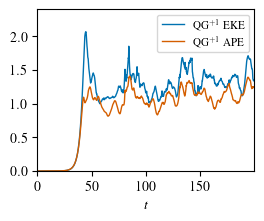

In [9]:
fig=plt.figure(figsize=(2.8, 2.1))

plt.plot(dg_time_ary,(KE_data)/vol,label=r"QG$^{+1}$ EKE")
plt.plot(dg_time_ary,(PE_data)/vol,label=r"QG$^{+1}$ APE")
plt.xlabel("$t$")
plt.legend()
plt.ylim([0,2.4])

figname = 'figs/EadyQGpl_KEPE.pdf'
plt.savefig(figname, bbox_inches='tight')

In [10]:
Ro = 0.032
randseed = sel

bt_all = np.empty([0,512,512])
zt_all = np.empty([0,512,512])
divt_all = np.empty([0,512,512])
straint_all = np.empty([0,512,512])

for di in range(16,21):
    print(di)
    
    spname = 'EadyQGPl_sp_%.3f_%d/EadyQGPl_sp_%.3f_%d_s%i' %(Ro, randseed, Ro, randseed, di )
    spname = spname.replace(".", "d" ); spname = "../"+spname+'.h5'

    # Plot writes
    with h5py.File(spname, mode='r') as file:
        bt_data = np.squeeze(np.array(file['tasks']['b_top']))
        zetat_data = np.squeeze(np.array(file['tasks']['zeta_top']))*0.032
        divt_data = np.squeeze(np.array(file['tasks']['div_top']))*0.032
        straint_data = np.squeeze(np.array(file['tasks']['strain_top']))*0.032
        
        bt_all = np.append(bt_all,bt_data,axis=0)
        zt_all = np.append(zt_all,zetat_data,axis=0)
        divt_all = np.append(divt_all,divt_data,axis=0)
        straint_all = np.append(straint_all,straint_data,axis=0)

16
17
18
19
20


In [11]:
Ro = 0.0
randseed = 2

bt_QGall = np.empty([0,512,512])
zt_QGall = np.empty([0,512,512])
straint_QGall = np.empty([0,512,512])

for di in range(16,21):
    print(di)
    
    spname = 'EadyQGPl_sp_%.3f_%d/EadyQGPl_sp_%.3f_%d_s%i' %(Ro, randseed, Ro, randseed, di )
    spname = spname.replace(".", "d" ); spname = "../"+spname+'.h5'

    # Plot writes
    with h5py.File(spname, mode='r') as file:
        bt_data = np.squeeze(np.array(file['tasks']['b_top']))
        zetat_data = np.squeeze(np.array(file['tasks']['zeta_top']))*0.032
        straint_data = np.squeeze(np.array(file['tasks']['strain_top']))*0.032
        
        bt_QGall = np.append(bt_QGall,bt_data,axis=0)
        zt_QGall = np.append(zt_QGall,zetat_data,axis=0)
        straint_QGall = np.append(straint_QGall,straint_data,axis=0)

16
17
18
19
20


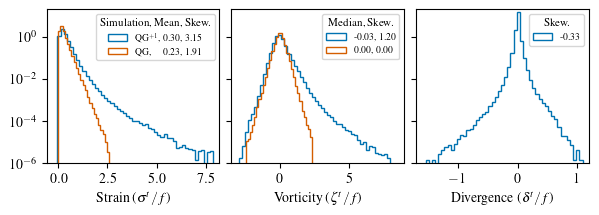

In [12]:
fig=plt.figure(figsize=(7, 2))

gs = fig.add_gridspec(1,3, wspace=0.07)
grid = gs.subplots(sharex=False, sharey=True)

grid[0].set_ylim([1e-6,20])

###################
data = zt_all[:,:,:].ravel()
binwidth = (max(data)-min(data))/70
biss = np.arange(min(data), max(data) + binwidth, binwidth)
grid[1].hist(zt_all[:,:,:].ravel(), log=True, density=True, bins=50, \
             histtype='step',  label="%.2f, %.2f" %(np.median(zt_all[:,:,:].ravel()), skew(zt_all[:,:,:].ravel())) )

data = zt_QGall[:,:,:].ravel()
grid[1].hist(zt_QGall[:,:,:].ravel(), log=True, density=True, bins= np.arange(min(data), max(data) + binwidth, binwidth) \
         , histtype='step',  label="%.2f, %.2f" %(np.median(zt_QGall[:,:,:].ravel()), skew(zt_QGall[:,:,:].ravel())) )

grid[1].set_xlabel("Vorticity ($\zeta^t/f$)")
grid[1].set_xlim([-3.5,9.0])

legend = grid[1].legend(title="Median, Skew.", fontsize=7)
plt.setp(legend.get_title(),fontsize=8)

# ###################
data = straint_all[:,:,:].ravel()
binwidth = (max(data)-min(data))/70
biss = np.arange(min(data), max(data) + binwidth, binwidth)
grid[0].hist(straint_all[:,:,:].ravel(), log=True, density=True, bins=50, \
             histtype='step',  label="QG$^{+1}$, %.2f, %.2f" %(np.mean(straint_all[:,:,:].ravel()), skew(straint_all[:,:,:].ravel()) ))

data = straint_QGall[:,:,:].ravel()
grid[0].hist(straint_QGall[:,:,:].ravel(), log=True, density=True, bins= np.arange(min(data), max(data) + binwidth, binwidth) \
         , histtype='step',  label="QG,$~~~~$ %.2f, %.2f" %(np.mean(straint_QGall[:,:,:].ravel()), skew(straint_QGall[:,:,:].ravel()) ))

grid[0].set_xlim([-0.6,8.2])
grid[0].set_xlabel("Strain ($\sigma^t/f$)")

legend = grid[0].legend(title="Simulation, Mean, Skew.", fontsize=7)
plt.setp(legend.get_title(),fontsize=8)

# #############
data = divt_all[:,:,:].ravel()
binwidth = (max(data)-min(data))/70
biss = np.arange(min(data), max(data) + binwidth, binwidth)
grid[2].hist(divt_all[:,:,:].ravel(), log=True, density=True, bins=50, histtype='step',  label="%.2f" %skew(divt_all[:,:,:].ravel()))

grid[2].set_xlim([-1.7,1.2])
grid[2].set_xlabel("Divergence ($\delta^t/f$)")

legend = grid[2].legend(title="Skew.", fontsize=7)
plt.setp(legend.get_title(),fontsize=8)

# ###########################
figname = 'figs/EadyQGpl_1DPDFs_Ro%.2f' %(Ro)
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
plt.savefig(figname, bbox_inches='tight')

plt.show()

In [13]:
# fig=plt.figure(figsize=(2.8, 2.0))

# data = zt_all[:,:,:].ravel()
# binwidth = (max(data)-min(data))/70
# biss = np.arange(min(data), max(data) + binwidth, binwidth)
# plt.hist(zt_all[:,:,:].ravel(), log=True, density=True, bins=50, histtype='step',  label="QG$^{+1}$, %.2f" %skew(zt_all[:,:,:].ravel()))

# data = zt_QGall[:,:,:].ravel()
# plt.hist(zt_QGall[:,:,:].ravel(), log=True, density=True, bins= np.arange(min(data), max(data) + binwidth, binwidth) \
#          , histtype='step',  label="QG,$~~~$ %.2f" %skew(zt_QGall[:,:,:].ravel()))
# plt.xlim([-3.5,8.5])
# plt.ylim([1e-6,5])
# plt.xlabel("$\zeta^t/f$")

# legend = plt.legend(title="Simulation, Skewness", fontsize=7)
# plt.setp(legend.get_title(),fontsize=8)

# figname = 'figs/EadyQGpl_zetaPDFs_Ro%.2f' %(Ro)
# figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# plt.savefig(figname, bbox_inches='tight')
# plt.show()

In [14]:
data = zt_all[:,:,:].ravel()
binwidth = (max(data)-min(data))/70

In [15]:
# Numerics Parameters
Lx, Ly = L, L

dealias = 3/2
dtype = np.float64

coords = d3.CartesianCoordinates('x', 'y', 'z')
dist = d3.Distributor(coords, dtype=dtype)
xbasis = d3.RealFourier(coords['x'], size=Nx, bounds=(0, Lx), dealias=dealias)
ybasis = d3.RealFourier(coords['y'], size=Ny, bounds=(0, Ly), dealias=dealias)

# Fields
b2d = dist.Field(bases=(xbasis,ybasis) )

In [16]:
temp = np.empty([Nx,Ny,1])
bt2_spec_sum = 0

bt2QG_spec_sum = 0

for time_i in range(bt_all.shape[0]):
    print(time_i)
# for time_i in [time_idx]:
    temp[:,:,0]=bt_all[time_i,:,:]
    b2d['g'] = temp; mag2d = np.squeeze(b2d['c'])*np.conj(np.squeeze(b2d['c']))
    b2d_spec = isospectrum(mag2d); 
    bt2_spec_sum += b2d_spec
    
    ####
    temp[:,:,0]=bt_QGall[time_i,:,:]
    b2d['g'] = temp; mag2d = np.squeeze(b2d['c'])*np.conj(np.squeeze(b2d['c']))
    b2d_spec = isospectrum(mag2d); 
    bt2QG_spec_sum += b2d_spec
    
bt2_spec = bt2_spec_sum/bt_all.shape[0]
bt2_QGspec = bt2QG_spec_sum/bt_all.shape[0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


/state/partition1/job-49287437/ipykernel_2071241/3227115957.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,90])


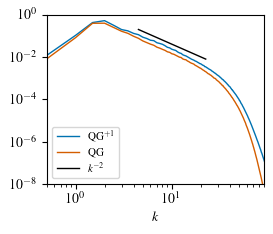

In [17]:
KK = xbasis.wavenumbers[2:-1:2]

fig=plt.figure(figsize=(2.8, 2.2))

plt.loglog(KK,bt2_spec[1:], label="QG$^{+1}$",color=(0,0.4453125,0.6953125))
plt.loglog(KK,bt2_QGspec[1:],'-', label="QG",color=(0.83203125,0.3671875,0.))

plt.loglog(KK[8:-210],KK[8:-210]**-(2)*4,'-',color='k', label="$k^{-2}$")

plt.axvline(KK[-1],color='k')
plt.ylim([1e-8,1])
plt.xlim([0,90])
plt.xlabel("$k$")

plt.legend()

figname = 'figs/EadyQGpl_bspec'
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
plt.savefig(figname, bbox_inches='tight')

plt.show()